In [1]:
input_file = "/kaggle/input/english-to-russian-language/rus.txt"
output_file = "/kaggle/working/clean_dataset.txt"

with open(input_file, "r", encoding="utf-8") as f:
    lines = f.readlines()

cleaned_lines = []
for line in lines:
    if "\t" in line:
        parts = line.split("\t")
        if len(parts) >= 2:
            cleaned_lines.append(f"{parts[0].lower()}\t{parts[1].lower()}\n")

with open(output_file, "w", encoding="utf-8") as f:
    f.writelines(cleaned_lines)

print(f"Датасет очищен и сохранен в {output_file}")

Датасет очищен и сохранен в /kaggle/working/clean_dataset.txt


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

def load_dataset(file_path):
    with open(file_path, "r", encoding="utf-8") as f:
        lines = f.readlines()
    return [line.strip().split("\t") for line in lines]

dataset = load_dataset("/kaggle/working/clean_dataset.txt")

df = pd.DataFrame(dataset, columns=["source", "target"])

print("Общая информация о датасете:")
print(df.info())
print("\nПримеры данных:")
print(df.head())

Общая информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399919 entries, 0 to 399918
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   source  399919 non-null  object
 1   target  399919 non-null  object
dtypes: object(2)
memory usage: 6.1+ MB
None

Примеры данных:
  source         target
0    go.          марш!
1    go.           иди.
2    go.         идите.
3    hi.  здравствуйте.
4    hi.        привет!


In [16]:
unique_source_words = set(" ".join(df["source"]).split())
unique_target_words = set(" ".join(df["target"]).split())

print(f"\nКоличество уникальных слов в исходных предложениях: {len(unique_source_words)}")
print(f"Количество уникальных слов в целевых предложениях: {len(unique_target_words)}")



Количество уникальных слов в исходных предложениях: 31077
Количество уникальных слов в целевых предложениях: 87892



Статистика длины предложений:
       source_length  target_length
count  399919.000000   399919.00000
mean        6.057924        5.24902
std         2.236346        2.07320
min         1.000000        1.00000
25%         5.000000        4.00000
50%         6.000000        5.00000
75%         7.000000        6.00000
max       101.000000       80.00000


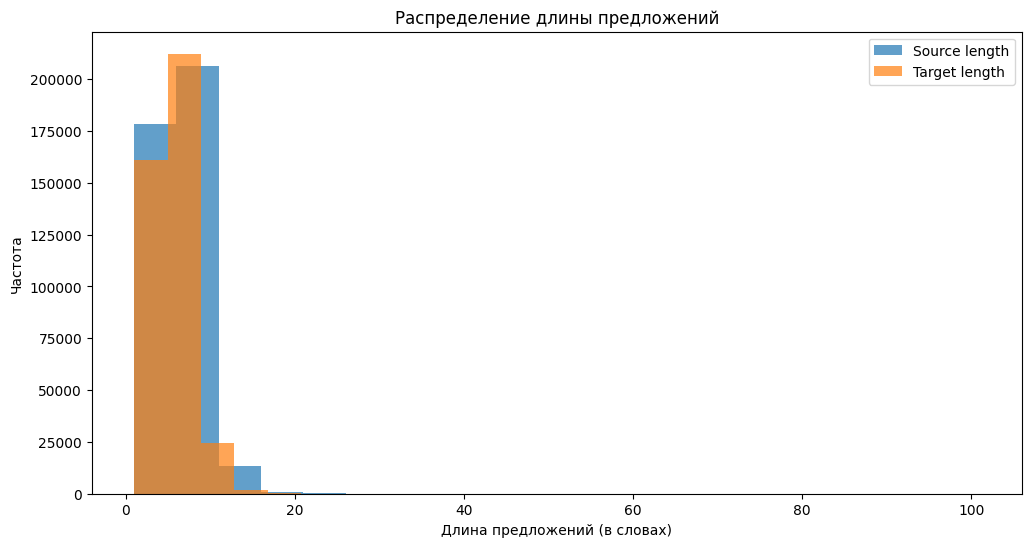

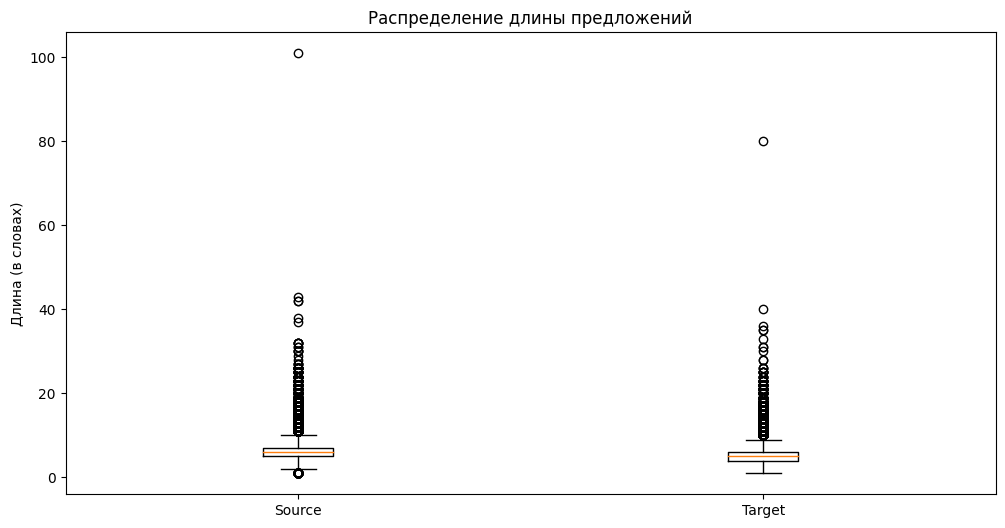

In [27]:
df["source_length"] = df["source"].apply(lambda x: len(x.split()))
df["target_length"] = df["target"].apply(lambda x: len(x.split()))

print("\nСтатистика длины предложений:")
print(df[["source_length", "target_length"]].describe())

plt.figure(figsize=(12, 6))
plt.hist(df["source_length"], bins=20, alpha=0.7, label="Source length")
plt.hist(df["target_length"], bins=20, alpha=0.7, label="Target length")
plt.title("Распределение длины предложений")
plt.xlabel("Длина предложений (в словах)")
plt.ylabel("Частота")
plt.legend()
plt.show()


plt.figure(figsize=(12, 6))
plt.boxplot([df["source_length"], df["target_length"]], labels=["Source", "Target"])
plt.title("Распределение длины предложений")
plt.ylabel("Длина (в словах)")
plt.show()


In [53]:
def get_ngrams(texts, n):
    vectorizer = CountVectorizer(ngram_range=(n, n), tokenizer=lambda x: x.split())
    ngrams = vectorizer.fit_transform(texts)
    return ngrams.sum(axis=0), vectorizer.get_feature_names_out()

bigram_freq, bigram_features = get_ngrams(df["source"], 2)
bigram_freq = [(bigram_features[i], bigram_freq[0, i]) for i in range(len(bigram_features))]
print("\nТоп-10 биграмм в исходных предложениях:")
print(sorted(bigram_freq, key=lambda x: x[1], reverse=True)[:10])


Топ-10 биграмм в исходных предложениях:
[('do you', 13163), ('tom is', 12037), ("i don't", 11377), ('want to', 9195), ('to do', 7265), ('did you', 6778), ('going to', 6299), ('are you', 6128), ('in the', 5486), ('tom was', 5299)]


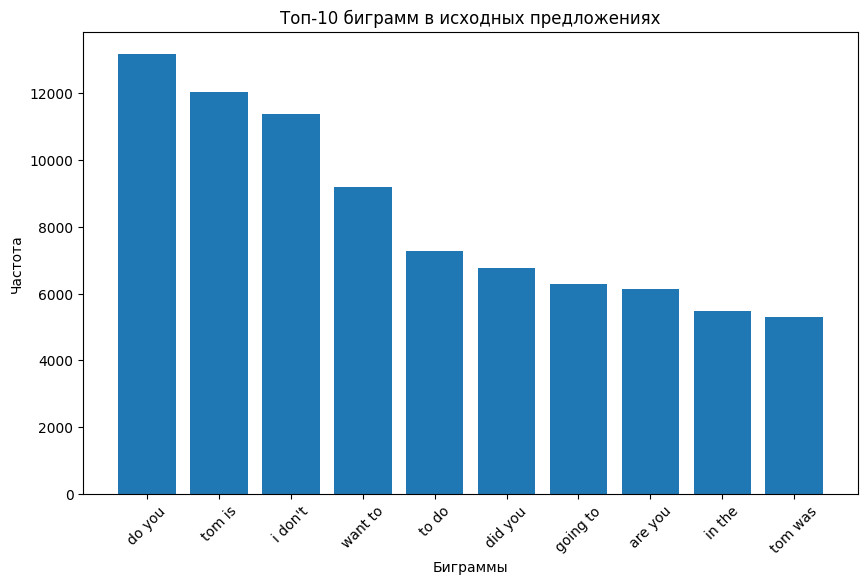

In [54]:
top_bigrams = sorted(bigram_freq, key=lambda x: x[1], reverse=True)[:10]
top_bigrams_words, top_bigrams_counts = zip(*top_bigrams)

plt.figure(figsize=(10, 6))
plt.bar(top_bigrams_words, top_bigrams_counts)
plt.title("Топ-10 биграмм в исходных предложениях")
plt.xlabel("Биграммы")
plt.ylabel("Частота")
plt.xticks(rotation=45)
plt.show()

In [55]:
bigram_freq, bigram_features = get_ngrams(df["target"], 2)
bigram_freq = [(bigram_features[i], bigram_freq[0, i]) for i in range(len(bigram_features))]
print("\nТоп-10 биграмм в целевых предложениях:")
print(sorted(bigram_freq, key=lambda x: x[1], reverse=True)[:10])


Топ-10 биграмм в целевых предложениях:
[('я не', 14667), ('том не', 8386), ('что том', 7352), ('у меня', 5507), ('что ты', 4940), ('что я', 4365), ('знал, что', 4267), ('что вы', 3829), ('я знаю,', 3743), ('у тома', 3740)]


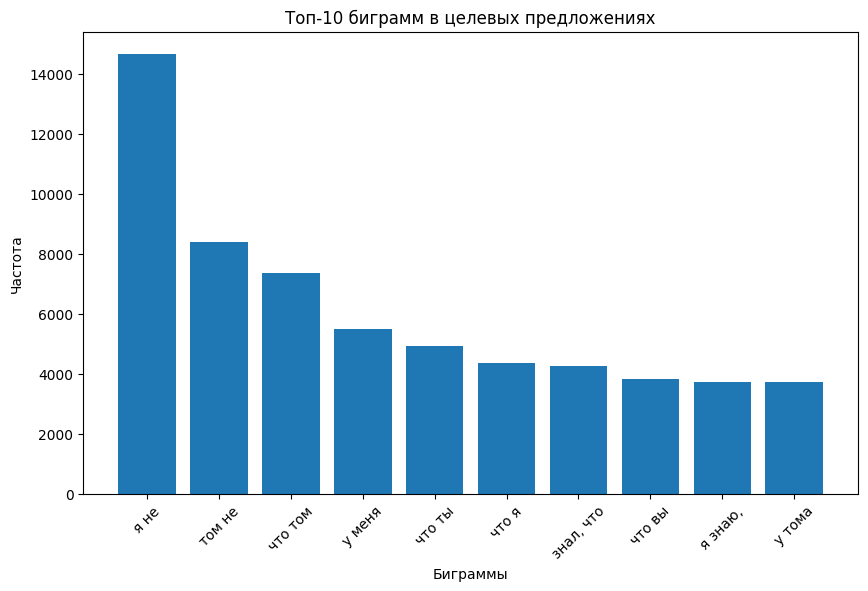

In [56]:
top_bigrams = sorted(bigram_freq, key=lambda x: x[1], reverse=True)[:10]
top_bigrams_words, top_bigrams_counts = zip(*top_bigrams)

plt.figure(figsize=(10, 6))
plt.bar(top_bigrams_words, top_bigrams_counts)
plt.title("Топ-10 биграмм в целевых предложениях")
plt.xlabel("Биграммы")
plt.ylabel("Частота")
plt.xticks(rotation=45)
plt.show()

In [61]:
trigram_freq, trigram_features = get_ngrams(df["source"], 3)
trigram_freq = [(trigram_features[i], trigram_freq[0, i]) for i in range(len(trigram_features))]

print("\nТоп-10 триграмм в исходных предложениях:")
print(sorted(trigram_freq, key=lambda x: x[1], reverse=True)[:10])


Топ-10 триграмм в исходных предложениях:
[("i don't think", 3058), ('to do that.', 2930), ('tom and mary', 2576), ('i want to', 2528), ("i don't know", 2214), ('do you want', 2113), ('do you think', 2112), ('you want to', 1972), ('tom told me', 1880), ("i didn't know", 1812)]


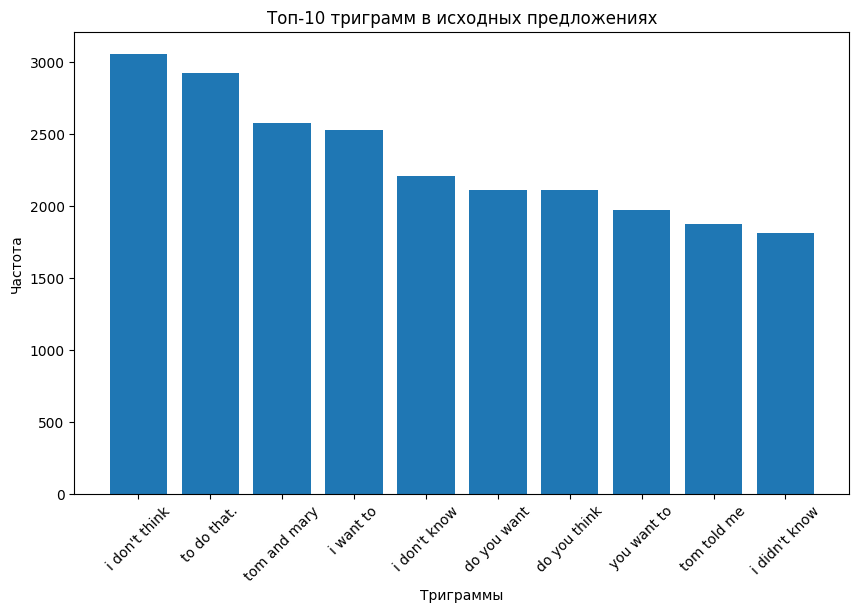

In [62]:
top_trigram = sorted(trigram_freq, key=lambda x: x[1], reverse=True)[:10]
top_trigram_words, top_trigram_counts = zip(*top_trigram)

plt.figure(figsize=(10, 6))
plt.bar(top_trigram_words, top_trigram_counts)
plt.title("Топ-10 триграмм в исходных предложениях")
plt.xlabel("Триграммы")
plt.ylabel("Частота")
plt.xticks(rotation=45)
plt.show()

In [63]:
trigram_freq, trigram_features = get_ngrams(df["target"], 3)
trigram_freq = [(trigram_features[i], trigram_freq[0, i]) for i in range(len(trigram_features))]

print("\nТоп-10 триграмм в целевых предложениях:")
print(sorted(trigram_freq, key=lambda x: x[1], reverse=True)[:10])


Топ-10 триграмм в целевых предложениях:
[('том сказал, что', 3203), ('я знаю, что', 2985), ('не думаю, что', 2980), ('не знал, что', 2192), ('том и мэри', 1810), ('я не могу', 1784), ('я хочу, чтобы', 1721), ('я не знал,', 1524), ('том сказал мне,', 1485), ('сказал мне, что', 1459)]


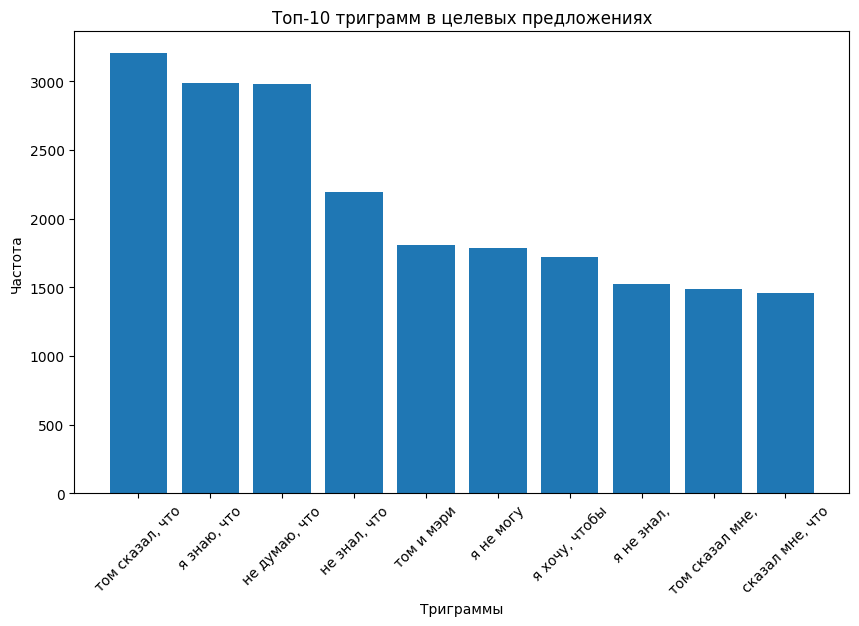

In [64]:
top_trigram = sorted(trigram_freq, key=lambda x: x[1], reverse=True)[:10]
top_trigram_words, top_trigram_counts = zip(*top_trigram)

plt.figure(figsize=(10, 6))
plt.bar(top_trigram_words, top_trigram_counts)
plt.title("Топ-10 триграмм в целевых предложениях")
plt.xlabel("Триграммы")
plt.ylabel("Частота")
plt.xticks(rotation=45)
plt.show()


Топ-10 частых слов в исходных предложениях:
[('i', 105498), ('tom', 101940), ('to', 93130), ('you', 83706), ('the', 64976), ('a', 47571), ('is', 37386), ('do', 30070), ('that', 29780), ('was', 23092)]

Топ-10 частых слов в целевых предложениях:
[('я', 99474), ('не', 89159), ('том', 80156), ('что', 56337), ('в', 41205), ('это', 38020), ('ты', 35898), ('вы', 27047), ('на', 23780), ('у', 20406)]


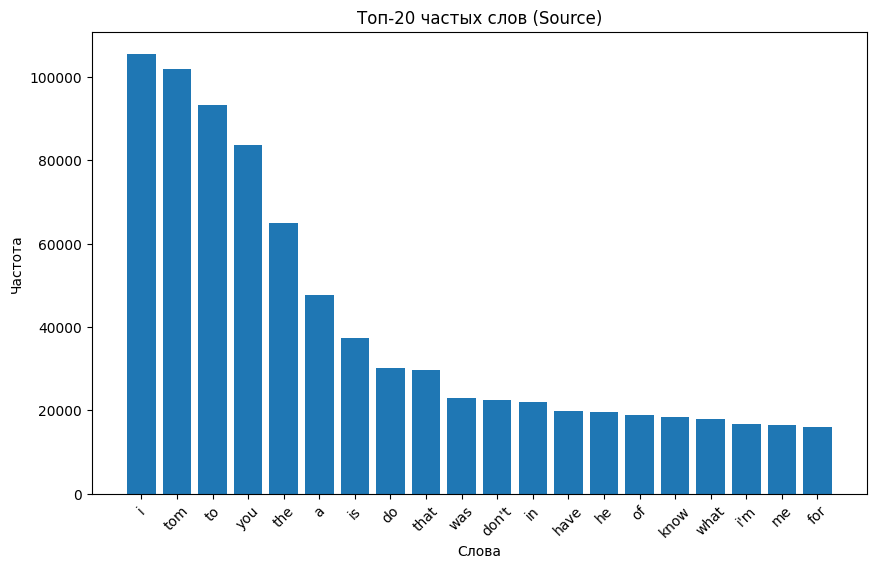

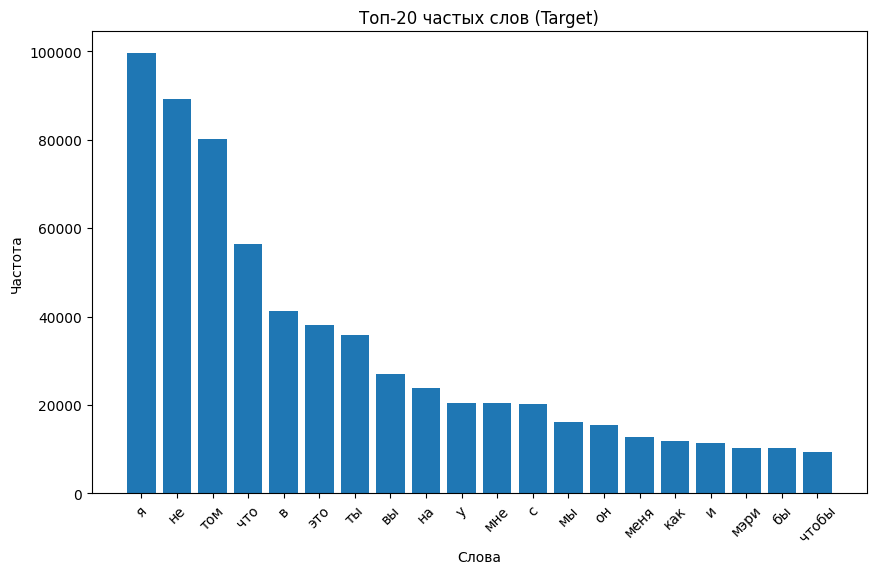

In [21]:
def get_word_frequencies(texts):
    counter = Counter()
    for text in texts:
        counter.update(text.split())
    return counter

source_word_freq = get_word_frequencies(df["source"])
target_word_freq = get_word_frequencies(df["target"])

print("\nТоп-10 частых слов в исходных предложениях:")
print(source_word_freq.most_common(10))

print("\nТоп-10 частых слов в целевых предложениях:")
print(target_word_freq.most_common(10))

def plot_word_frequencies(freqs, title):
    words, counts = zip(*freqs.most_common(20))
    plt.figure(figsize=(10, 6))
    plt.bar(words, counts)
    plt.title(title)
    plt.xlabel("Слова")
    plt.ylabel("Частота")
    plt.xticks(rotation=45)
    plt.show()

plot_word_frequencies(source_word_freq, "Топ-20 частых слов (Source)")
plot_word_frequencies(target_word_freq, "Топ-20 частых слов (Target)")

In [29]:
source_word_counts = pd.Series(" ".join(df["source"]).split()).value_counts()
target_word_counts = pd.Series(" ".join(df["target"]).split()).value_counts()

rare_source_words = source_word_counts[source_word_counts == 1]
rare_target_words = target_word_counts[target_word_counts == 1]

print("\nРедкие слова в исходных предложениях:")
print(rare_source_words)

print("\nРедкие слова в целевых предложениях:")
print(rare_target_words)



Редкие слова в исходных предложениях:
created,       1
insurgents,    1
sumerian?      1
though,        1
urgency        1
              ..
noel"          1
"away          1
manger."       1
associated     1
finance,       1
Name: count, Length: 10110, dtype: int64

Редкие слова в целевых предложениях:
близко,          1
круто!           1
произношение,    1
носителей,       1
звучанию         1
                ..
высшие           1
идеалы.          1
президента,      1
алло!            1
остановись!      1
Name: count, Length: 38265, dtype: int64


In [31]:
source_word_set = set(" ".join(df["source"]).split())
target_word_set = set(" ".join(df["target"]).split())

common_words = source_word_set.intersection(target_word_set)
print(f"\nКоличество общих слов: {len(common_words)}")
print(common_words)


Количество общих слов: 313
{'5.', '7.', '5:30', '19', 'cd', 'ipod.', "it's", '6400', '28', 'trouble', 'firefox', '1939.', '16', '20', 'first', '10%', '3,', '800', '400', '24,', '11', '32', '1936', '3.', '20.', '1995', '22', '170', '13', '$900', 'ipad.', '2:30.', '54', '2013.', '180', 'w', '150', '30.', '450', '26.', '16.', '97', 'ipad', 'python,', '1903', '125', '20%', '35', 'linux', 'c', 'amazon.com.', '1945.', '1977', 'cnn?', '1970.', '303?', '4.', 'abc', 'and', '1980', '39.', '"away', 'a', 'mp3', '46', '105?', '2013', 'birds?', 'nhk', 'angry', '90%', '59.', 'cnn.', '21', '1982', '30', '455', '98', '111?', 'windows.', '9:35', '95%', '120', '1886', '"b"', 'm', '130', '5%', '80%', 'mastercard', '105.', '95', 'h₂o.', '11.', '1939', '2:30,', '50', '65.', 'ibm.', '18,', '250', '1978', '9:00.', '1865.', '6%.', '90', 'facebook.', '3:00.', 'juli.', '2008.', 'linux.', '5%.', '60', '1924', '2539', '80', '14', '70', 'ok.', '7:30.', 'ua', '8.', '7,', '25.', '2:30', 'gps', '65', 'in', '38,', '38

In [23]:
from textblob import TextBlob

In [39]:
def analyze_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['source_sentiment'] = df['source'].apply(analyze_sentiment)
df['target_sentiment'] = df['target'].apply(analyze_sentiment)

print("\nСредняя тональность исходных предложений:", df['source_sentiment'].mean())
print("Средняя тональность целевых предложений:", df['target_sentiment'].mean())


Средняя тональность исходных предложений: 0.03425063883211331
Средняя тональность целевых предложений: 3.750759528804583e-07


In [38]:
df['sentiment_difference'] = df['target_sentiment'] - df['source_sentiment']
print("\nСредняя разница в тональности:", df['sentiment_difference'].mean())


Средняя разница в тональности: -0.03425026375616043


In [28]:
punctuation_counts_source = df['source'].str.count(r'[^ws]')
punctuation_counts_target = df['target'].str.count(r'[^ws]')

print("\nСреднее количество знаков препинания в исходных предложениях:", punctuation_counts_source.mean())
print("Среднее количество знаков препинания в целевых предложениях:", punctuation_counts_target.mean())


Среднее количество знаков препинания в исходных предложениях: 27.89524378686684
Среднее количество знаков препинания в целевых предложениях: 29.71792788039578


In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['source'].tolist() + df['target'].tolist())

kmeans = KMeans(n_clusters=4, n_init='auto', random_state=42)
kmeans.fit(X)

df['cluster'] = kmeans.labels_[:len(df)]
print("\nКластеры предложений:")
print(df[['source', 'cluster']])


Кластеры предложений:
                                                   source  cluster
0                                                     go.        3
1                                                     go.        3
2                                                     go.        3
3                                                     hi.        3
4                                                     hi.        3
...                                                   ...      ...
399914  in today's world, we have to equip all our kid...        1
399915  death is something that we're often discourage...        1
399916  at a moment when our economy is growing, our b...        1
399917  since there are usually multiple websites on a...        1
399918  doubtless there exists in this world precisely...        1

[399919 rows x 2 columns]
